<a href="https://colab.research.google.com/github/ConorDawson/Conor_Dawson_T00226371_Genetic_Algorithm/blob/main/Conor_Dawson_Genetic_Algorithm_Roughwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Individual


---


An individual represents a single candidate timetable. It consists of a list of scheduled classes, where each class has:



*   A subject
*   A teacher
*   A classroom
*   A day and timeslot

---
Each individual is a full schedule containing all the required subjects and their respective assignments.


---
#Chromosome
A chromosome is a collection of genes that form an individual.

In this case, a chromosome is a full timetable, consisting of multiple scheduled classes. Each scheduled class is a gene within the chromosome.


---

#Crossover
Crossover is the process of creating a new timetable (child) from two parent timetables by combining parts of each.
In this implementation, i will use one-point crossover, where a random point in the timetable is selected:

* The first part of the child comes from one parent
* The second part comes from the other parent

This allows for diversity in the population while maintaining valid structures.


---
# Mutation
Mutation introduces random changes to an individual to help explore new solutions and avoid local optima.
The mutation function:

* Selects a random class in the timetable
* Reassigns a new teacher, room, or time slot

This prevents the algorithm from getting stuck in a suboptimal solution.


---

#Cost Function (Fitness Function):
The fitness function evaluates the timetable based on teacher and room conflicts:

* **Teacher Conflict Penalty** (-10 per conflict)
If a teacher is scheduled for more than one subject in the same time slot on the same day, 10 points are deducted.

* **Room Conflict Penalty** (-10 per conflict)
If more than one subject is assigned to the same room in the same time slot on the same day, 10 points are deducted.

* **Same Class Same Day Penalty** (-10 per conflict)
If there is a class held twice in the same day, 10 points are deducted

---

In [ ]:
import random
from prettytable import PrettyTable

# Define problem parameters
NUM_TEACHERS = 5
NUM_CLASSES = 6
NUM_TIMESLOTS = 5  # per day
DAYS = 5
POPULATION_SIZE = 50
GENERATIONS = 100
MUTATION_RATE = 0.1

# Sample teacher names for better readability
TEACHER_NAMES = ["Robert Sheehy", "Andrew Shields", "Claire Horgan", "Peter Given", "John Brosnan", "Gene Farrel", "Anne O'Brien", "Linda O Loughlin", "Padriac Moriarty"]
CLASS_NAMES = [f"Class {i+1}" for i in range(NUM_CLASSES)]


# Generate random initial population
def generate_timetable():
    """
    A timetable is represented as a list of time slots.
    Each slot contains a list of (teacher, class) assignments.
    """
    return [
        [(random.randint(0, NUM_TEACHERS - 1), class_id) for class_id in range(NUM_CLASSES)]
        for _ in range(DAYS * NUM_TIMESLOTS)
    ]

# Fitness function
def fitness(timetable):
    """
    Score the timetable based on constraint satisfaction.
    Higher scores mean fewer conflicts.
    """
    score = 0
    teacher_schedule = {}  # Tracks teachers' occupied slots

    for slot_index, slot in enumerate(timetable):
        teachers_in_slot = set()
        for teacher, _ in slot:
            if teacher in teachers_in_slot:
                score -= 10  # Penalize teacher conflict in the same slot
            else:
                teachers_in_slot.add(teacher)

            # Check if teacher has consecutive slots (optional constraint)
            if teacher in teacher_schedule:
                if teacher_schedule[teacher] == slot_index - 1:
                    score -= 2  # Penalize back-to-back classes (optional)
            teacher_schedule[teacher] = slot_index

    return score

# Selection (Tournament Selection)
def select(population):
    return max(random.sample(population, 3), key=fitness)

# Crossover (One-point crossover)
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 2)
    return parent1[:point] + parent2[point:]

# Mutation
def mutate(timetable):
    if random.random() < MUTATION_RATE:
        day, slot = random.randint(0, DAYS-1), random.randint(0, NUM_TIMESLOTS-1)
        class_idx = random.randint(0, NUM_CLASSES-1)
        timetable[day * NUM_TIMESLOTS + slot][class_idx] = (random.randint(0, NUM_TEACHERS - 1), class_idx)
    return timetable

# Genetic Algorithm
def genetic_algorithm():
    population = [generate_timetable() for _ in range(POPULATION_SIZE)]

    for generation in range(GENERATIONS):
        new_population = []
        for _ in range(POPULATION_SIZE):
            parent1, parent2 = select(population), select(population)
            child = crossover(parent1, parent2)
            new_population.append(mutate(child))

        population = sorted(new_population, key=fitness, reverse=True)[:POPULATION_SIZE]

        if fitness(population[0]) >= 0:  # Ideal score threshold (adjust as needed)
            break

    return population[0]

# Function to print the timetable in a formatted way
def print_timetable(timetable):
    print("\n===== Optimized School Timetable =====\n")
    timeslots = ["09:00-10:00", "10:00-11:00", "11:00-12:00", "13:00-14:00", "14:00-15:00"]

    for day in range(DAYS):
        table = PrettyTable()
        table.field_names = ["Time Slot"] + CLASS_NAMES

        for slot in range(NUM_TIMESLOTS):
            row = [timeslots[slot]]  # Start row with time slot
            period_index = day * NUM_TIMESLOTS + slot  # Get correct index from timetable

            for teacher, _ in timetable[period_index]:
                row.append(TEACHER_NAMES[teacher])  # Convert teacher index to name

            table.add_row(row)

        print(f"**Day {day + 1} (Monday-Friday)**")
        print(table)
        print("\n")

# Run GA and print the best timetable
best_timetable = genetic_algorithm()
print_timetable(best_timetable)



===== Optimized School Timetable =====

**Day 1 (Monday-Friday)**
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  Time Slot  |    Class 1     |    Class 2     |    Class 3     |    Class 4     |    Class 5     |    Class 6     |
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
| 09:00-10:00 | Andrew Shields |  Peter Given   | Andrew Shields |  John Brosnan  |  John Brosnan  | Claire Horgan  |
| 10:00-11:00 | Andrew Shields | Robert Sheehy  |  Peter Given   | Andrew Shields | Andrew Shields | Andrew Shields |
| 11:00-12:00 | Claire Horgan  |  Peter Given   |  Peter Given   | Robert Sheehy  |  John Brosnan  |  Peter Given   |
| 13:00-14:00 |  John Brosnan  | Robert Sheehy  | Claire Horgan  |  John Brosnan  | Andrew Shields | Andrew Shields |
| 14:00-15:00 |  Peter Given   | Andrew Shields | Robert Sheehy  | Robert Sheehy  |  Peter Given   |  Peter

Add subjects and classrooms to be assigned.

As well as make classes 2 hours longs and add the break from 1 to 2 as well as the half day on friday


Assign each Lecturer Certain subjects that they are allowed to teach and change the tabular layout to print more like an actual timetable


In [ ]:
import random
from prettytable import PrettyTable

# Problem Parameters
TEACHER_SUBJECT_MAPPING = {
    "Artificial Intelligence": "Robert Sheehy",
    "Dev Ops": "Padriac Moriarty",
    "Networking": "Gene Farrel",
    "Object Oriented Programming": "John Brosnan",
    "Server Side Development": "Anne O'Brien",
    "Project Management": "Claire Horgan",
    "Cloud Development": "Linda O Loughlin",
    "Data Analytics": "Andrew Shields"
}

CLASSROOMS = ["S300", "S302", "S304", "S306", "T300", "T302", "T304", "T306",
              "R300", "T108", "T110", "T118"]

DAYS = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
TIME_SLOTS = ["09:00-11:00", "11:00-13:00", "14:00-16:00", "16:00-18:00"]

POPULATION_SIZE = 100
GENERATIONS = 200
MUTATION_RATE = 0.1

# Generate Initial Population
def generate_timetable():
    timetable = []
    for subject, teacher in TEACHER_SUBJECT_MAPPING.items():
        for _ in range(2):  # Each subject has 2 slots per week
            day = random.choice(DAYS)
            slot = random.choice(TIME_SLOTS if day != "Friday" else TIME_SLOTS[:2])
            room = random.choice(CLASSROOMS)
            timetable.append((subject, teacher, room, slot, day))
    return timetable

# Fitness Function/Cost function
def fitness(timetable):
    score = 0
    teacher_schedule = {}
    room_schedule = {}

    for subject, teacher, room, slot, day in timetable:
        key = (day, slot)

        # Teacher availability check
        if key in teacher_schedule and teacher in teacher_schedule[key]:
            score -= 10  # Teacher conflict penalty
        else:
            teacher_schedule.setdefault(key, []).append(teacher)

        # Room availability check
        if key in room_schedule and room in room_schedule[key]:
            score -= 10  # Room conflict penalty
        else:
            room_schedule.setdefault(key, []).append(room)


    return score

# Selection (Tournament Selection)
def select(population):
    return max(random.sample(population, 5), key=fitness)

# Crossover (Uniform crossover)
def crossover(parent1, parent2):
    child = []
    for i in range(len(parent1)):
        child.append(parent1[i] if random.random() < 0.5 else parent2[i])
    return child

# Mutation
def mutate(timetable):
    if random.random() < MUTATION_RATE:
        idx = random.randint(0, len(timetable) - 1)
        subject, teacher, _, slot, day = timetable[idx]
        new_room = random.choice(CLASSROOMS)
        new_slot = random.choice(TIME_SLOTS if day != "Friday" else TIME_SLOTS[:2])
        timetable[idx] = (subject, teacher, new_room, new_slot, day)
    return timetable

# Genetic Algorithm
def genetic_algorithm():
    population = [generate_timetable() for _ in range(POPULATION_SIZE)]

    for generation in range(GENERATIONS):
        new_population = []
        for _ in range(POPULATION_SIZE):
            parent1, parent2 = select(population), select(population)
            child = crossover(parent1, parent2)
            new_population.append(mutate(child))

        population = sorted(new_population, key=fitness, reverse=True)[:POPULATION_SIZE]

        if fitness(population[0]) >= 0:  # Ideal fitness score threshold
            break

    return population[0]


print(best_timetable)



[[(1, 0), (3, 1), (1, 2), (4, 3), (4, 4), (2, 5)], [(1, 0), (0, 1), (3, 2), (1, 3), (1, 4), (1, 5)], [(2, 0), (3, 1), (3, 2), (0, 3), (4, 4), (3, 5)], [(4, 0), (0, 1), (2, 2), (4, 3), (1, 4), (1, 5)], [(3, 0), (1, 1), (0, 2), (0, 3), (3, 4), (3, 5)], [(2, 0), (3, 1), (2, 2), (2, 3), (0, 4), (1, 5)], [(0, 0), (4, 1), (3, 2), (0, 3), (2, 4), (0, 5)], [(4, 0), (3, 1), (2, 2), (4, 3), (1, 4), (3, 5)], [(2, 0), (0, 1), (4, 2), (1, 3), (4, 4), (0, 5)], [(2, 0), (3, 1), (2, 2), (0, 3), (4, 4), (1, 5)], [(2, 0), (3, 1), (2, 2), (2, 3), (1, 4), (4, 5)], [(4, 0), (2, 1), (3, 2), (1, 3), (3, 4), (2, 5)], [(0, 0), (4, 1), (2, 2), (3, 3), (3, 4), (4, 5)], [(0, 0), (3, 1), (3, 2), (0, 3), (0, 4), (4, 5)], [(1, 0), (0, 1), (4, 2), (2, 3), (1, 4), (0, 5)], [(3, 0), (3, 1), (2, 2), (0, 3), (2, 4), (0, 5)], [(1, 0), (1, 1), (3, 2), (4, 3), (1, 4), (2, 5)], [(0, 0), (0, 1), (4, 2), (3, 3), (4, 4), (1, 5)], [(0, 0), (3, 1), (4, 2), (0, 3), (4, 4), (0, 5)], [(2, 0), (3, 1), (3, 2), (0, 3), (3, 4), (4, 5)],

In [ ]:
# Print Timetable Function
def print_timetable(timetable):
    print("\n===== Optimized College Timetable =====\n")

    # Create a dictionary to store the timetable in the required format
    schedule = {slot: {day: "" for day in DAYS} for slot in TIME_SLOTS}

    # Fill the schedule with subjects
    for subject, teacher, room, slot, day in timetable:
        schedule[slot][day] = subject + " - " + teacher + " - " + room

    # Create the PrettyTable
    table = PrettyTable()
    table.field_names = ["Time"] + DAYS

    # Add rows for each time slot
    for slot in TIME_SLOTS:
        row = [slot] + [schedule[slot][day] for day in DAYS]  # Fill each day
        table.add_row(row)

    print(table)

# Run GA and print timetable
best_timetable = genetic_algorithm()
print_timetable(best_timetable)


===== Optimized College Timetable =====

+-------------+-----------------------------------------------+------------------------------------------------+-------------------------------------------+---------------------------------------------------+------------------------------------------------+
|     Time    |                     Monday                    |                    Tuesday                     |                 Wednesday                 |                      Thursday                     |                     Friday                     |
+-------------+-----------------------------------------------+------------------------------------------------+-------------------------------------------+---------------------------------------------------+------------------------------------------------+
| 09:00-11:00 |                                               | Artificial Intelligence - Robert Sheehy - T302 | Project Management - Claire Horgan - T108 |                            

The new problem now is two of the same classes shouldnt be on the same day as has been show to be possible from this:

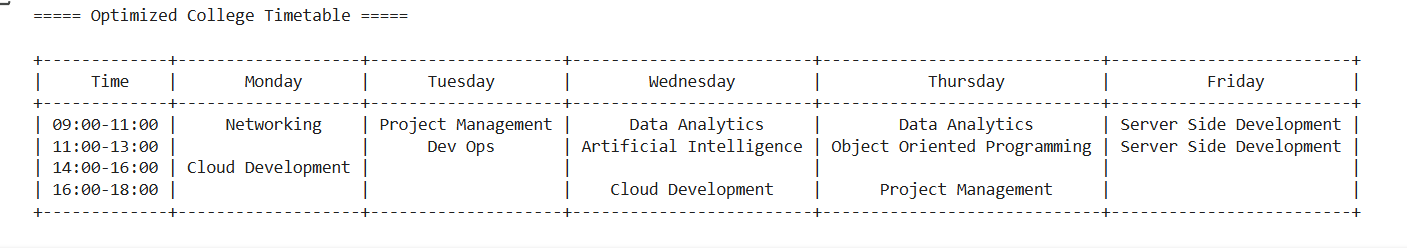


the friday has 2 server side developments on the same day while the chances of this are low i want to make it so if there are four hours of one class on some day that it will mutate and change the table accordingly


In [ ]:
import random
from prettytable import PrettyTable

# Problem Parameters
CLASSES = {"Software Developement",
           "Games Developement"}

CLASS_SUBJECT_MAPPING = {
    "Artificial Intelligence": "Software Developement",
    "Mobile Games Development": "Games Developement",
    "Dev Ops": "Software Developement",
    "Project Management": "Software Developement",
    "Cloud Development": "Software Developement",
    "Final Year Project": "Software Developement",
    "Artificial Intelligence": "Games Developement",
    "Project Management": "Games Developement",
    "Cloud Development": "Games Developement",
    "Final Year Project": "Games Developement"
}


TEACHER_SUBJECT_MAPPING = {
    "Artificial Intelligence": "Robert Sheehy",
    "Mobile Games Development": "Robert Sheehy",
    "Dev Ops": "Padriac Moriarty",
    "Project Management": "Claire Horgan",
    "Cloud Development": "Therese Enright",
    "Final Year Project": "Andrew Shields"
}

CLASSROOMS = ["S300", "S302", "S304", "S306", "T300", "T302", "T304", "T306",
              "R300", "T108", "T110", "T118"]

DAYS = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
TIME_SLOTS = ["09:00-11:00", "11:00-13:00", "14:00-16:00", "16:00-18:00"]

POPULATION_SIZE = 100
GENERATIONS = 200
MUTATION_RATE = 0.1

# Generate Initial Population
def generate_timetable():
    timetable = []
    for subject, teacher in TEACHER_SUBJECT_MAPPING.items():
        for _ in range(2):  # Each subject has 2 slots per week
            day = random.choice(DAYS)
            slot = random.choice(TIME_SLOTS if day != "Friday" else TIME_SLOTS[:2])
            room = random.choice(CLASSROOMS)
            timetable.append((subject, teacher, room, slot, day))
    return timetable

# Fitness Function/Cost function
def fitness(timetable):
    score = 0
    teacher_schedule = {}
    room_schedule = {}
    subject_schedule = {}

    for subject, teacher, room, slot, day in timetable:
        key = (day, slot)

        # Teacher availability check
        if key in teacher_schedule and teacher in teacher_schedule[key]:
            score -= 10
        else:
            teacher_schedule.setdefault(key, []).append(teacher)

        # Room availability check
        if key in room_schedule and room in room_schedule[key]:
            score -= 10
        else:
            room_schedule.setdefault(key, []).append(room)

        # Subject availability check
        if day in subject_schedule and subject in subject_schedule[day]:
            score -= 10
        else:
            subject_schedule.setdefault(day, []).append(subject)


    return score

# Selection (Tournament Selection)
def select(population):
    return max(random.sample(population, 5), key=fitness)

# Crossover (Uniform crossover)
def crossover(parent1, parent2):
    child = []
    for i in range(len(parent1)):
        child.append(parent1[i] if random.random() < 0.5 else parent2[i])
    return child

# Mutation
def mutate(timetable):
    if random.random() < MUTATION_RATE:
        idx = random.randint(0, len(timetable) - 1)
        subject, teacher, _, slot, day = timetable[idx]
        new_room = random.choice(CLASSROOMS)
        new_slot = random.choice(TIME_SLOTS if day != "Friday" else TIME_SLOTS[:2])
        timetable[idx] = (subject, teacher, new_room, new_slot, day)
    return timetable

# Genetic Algorithm
def genetic_algorithm():
    population = [generate_timetable() for _ in range(POPULATION_SIZE)]

    for generation in range(GENERATIONS):
        new_population = []
        for _ in range(POPULATION_SIZE):
            parent1, parent2 = select(population), select(population)
            child = crossover(parent1, parent2)
            new_population.append(mutate(child))

        population = sorted(new_population, key=fitness, reverse=True)[:POPULATION_SIZE]

        if fitness(population[0]) >= 0:  # Ideal fitness score threshold
            break

    return population[0]


print(best_timetable)



[('Artificial Intelligence', 'Robert Sheehy', 'T304', '09:00-11:00', 'Friday'), ('Artificial Intelligence', 'Robert Sheehy', 'T302', '09:00-11:00', 'Tuesday'), ('Dev Ops', 'Padriac Moriarty', 'T300', '11:00-13:00', 'Friday'), ('Dev Ops', 'Padriac Moriarty', 'S300', '16:00-18:00', 'Tuesday'), ('Networking', 'Gene Farrel', 'T304', '11:00-13:00', 'Friday'), ('Networking', 'Gene Farrel', 'T302', '14:00-16:00', 'Monday'), ('Object Oriented Programming', 'John Brosnan', 'R300', '14:00-16:00', 'Thursday'), ('Object Oriented Programming', 'John Brosnan', 'S302', '16:00-18:00', 'Thursday'), ('Server Side Development', "Anne O'Brien", 'T300', '16:00-18:00', 'Monday'), ('Server Side Development', "Anne O'Brien", 'S302', '11:00-13:00', 'Friday'), ('Project Management', 'Claire Horgan', 'T108', '09:00-11:00', 'Wednesday'), ('Project Management', 'Claire Horgan', 'T302', '16:00-18:00', 'Wednesday'), ('Cloud Development', 'Linda O Loughlin', 'T300', '16:00-18:00', 'Tuesday'), ('Cloud Development', 'L

In [ ]:
# Print Timetable Function
def print_timetable(timetable):
    print("\n===== Optimized College Timetable =====\n")

    # Create a dictionary to store the timetable in the required format
    schedule = {slot: {day: "" for day in DAYS} for slot in TIME_SLOTS}

    # Fill the schedule with subjects
    for subject, teacher, room, slot, day in timetable:
        schedule[slot][day] = subject + " - " + teacher + " - " + room

    # Create the PrettyTable
    table = PrettyTable()
    table.field_names = ["Time"] + DAYS

    # Add rows for each time slot
    for slot in TIME_SLOTS:
        row = [slot] + [schedule[slot][day] for day in DAYS]  # Fill each day
        table.add_row(row)

    print(table)

# Run GA and print timetable
best_timetable = genetic_algorithm()
print_timetable(best_timetable)

print(best_timetable)


===== Optimized College Timetable =====

+-------------+------------------------------------------------+--------------------------------------------+-------------------------------------------------+-------------------------------------------------+------------------------------------------------+
|     Time    |                     Monday                     |                  Tuesday                   |                    Wednesday                    |                     Thursday                    |                     Friday                     |
+-------------+------------------------------------------------+--------------------------------------------+-------------------------------------------------+-------------------------------------------------+------------------------------------------------+
| 09:00-11:00 |                                                |                                            | Mobile Games Development - Robert Sheehy - T302 | Mobile Games Developm

In [ ]:
import random
from prettytable import PrettyTable

# Problem Parameters
CLASSES = ["Software Development", "Games Development"]

CLASS_SUBJECT_MAPPING = {
    "Software Development": [
        "Artificial Intelligence",
        "Dev Ops",
        "Project Management",
        "Cloud Development",
        "Final Year Project Development"
    ],
    "Games Development": [
        "Artificial Intelligence",
        "Mobile Games Development",
        "Project Management",
        "Cloud Development",
        "Final Year Project Development"
    ]
}

TEACHER_SUBJECT_MAPPING = {
    "Artificial Intelligence": "Robert Sheehy",
    "Mobile Games Development": "Robert Sheehy",
    "Dev Ops": "Padriac Moriarty",
    "Project Management": "Claire Horgan",
    "Cloud Development": "Therese Enright",
    "Final Year Project Development": "Andrew Shields"
}

CLASSROOMS = ["S300", "S302", "S304", "S306", "T300", "T302", "T304", "T306",
              "R300", "T108", "T110", "T118"]

DAYS = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
TIME_SLOTS = ["09:00-11:00", "11:00-13:00", "14:00-16:00", "16:00-18:00"]

POPULATION_SIZE = 100
GENERATIONS = 200
MUTATION_RATE = 0.1

# Generate Initial Population
def generate_timetable(course):
    timetable = {day: {slot: None for slot in TIME_SLOTS} for day in DAYS}
    class_daily_subjects = {day: set() for day in DAYS}  # Track subjects per day

    for subject in CLASS_SUBJECT_MAPPING[course]:
        teacher = TEACHER_SUBJECT_MAPPING[subject]
        for _ in range(2):  # Each subject has 2 slots per week
            while True:
                day = random.choice(DAYS)
                slot = random.choice(TIME_SLOTS if day != "Friday" else TIME_SLOTS[:2])

                # Ensure no conflicts: no duplicate subjects on the same day
                if timetable[day][slot] is None and subject not in class_daily_subjects[day]:
                    room = random.choice(CLASSROOMS)
                    timetable[day][slot] = f"{subject}\n{teacher}\n{room}"
                    class_daily_subjects[day].add(subject)  # Mark subject as scheduled for the day
                    break
    return timetable



def fitness(timetable):
    score = 0
    teacher_schedule = {}
    room_schedule = {}
    class_schedule = {}  # Tracks subjects assigned to each class per day

    for day, slots in timetable.items():
        for slot, entry in slots.items():
            if entry is None:  # Skip empty slots
                continue

            subject, teacher, room = entry.split("\n")  # Unpack the timetable entry
            key = (day, slot)

            # Teacher availability check
            if key in teacher_schedule and teacher in teacher_schedule[key]:
                score -= 10
            else:
                teacher_schedule.setdefault(key, []).append(teacher)

            # Room availability check
            if key in room_schedule and room in room_schedule[key]:
                score -= 10
            else:
                room_schedule.setdefault(key, []).append(room)

            # Subject conflict check for the same class on the same day
            class_key = (day, subject)
            if class_key in class_schedule:
                score -= 10  # Subject conflict penalty
            else:
                class_schedule[class_key] = 1  # Mark subject assigned to class on this day

    return score

# Selection (Tournament Selection)
def select(population):
    return max(random.sample(population, 5), key=fitness)

# Crossover (Uniform crossover)
def crossover(parent1, parent2):
    child = {day: {} for day in DAYS}
    for day in DAYS:
        for slot in TIME_SLOTS:
            child[day][slot] = parent1[day][slot] if random.random() < 0.5 else parent2[day][slot]
    return child

# Mutation
def mutate(timetable):
    if random.random() < MUTATION_RATE:
        day = random.choice(DAYS)
        slot = random.choice(TIME_SLOTS if day != "Friday" else TIME_SLOTS[:2])
        new_room = random.choice(CLASSROOMS)

        if timetable[day][slot]:
            subject, teacher, _ = timetable[day][slot].split("\n")
            timetable[day][slot] = f"{subject}\n{teacher}\n{new_room}"
    return timetable

# Genetic Algorithm
def genetic_algorithm(course):
    population = [generate_timetable(course) for _ in range(POPULATION_SIZE)]

    for generation in range(GENERATIONS):
        new_population = []
        for _ in range(POPULATION_SIZE):
            parent1, parent2 = select(population), select(population)
            child = crossover(parent1, parent2)
            new_population.append(mutate(child))

        population = sorted(new_population, key=fitness, reverse=True)[:POPULATION_SIZE]

        if fitness(population[0]) >= 0:
            break

    return population[0]

# Generate best timetables for both courses
best_timetable_software = genetic_algorithm("Software Development")
best_timetable_games = genetic_algorithm("Games Development")

# Display the timetables
def display_timetable(timetable, course_name):
    table = PrettyTable(["Time Slot"] + DAYS)

    for slot in TIME_SLOTS:
        row = [slot]
        for day in DAYS:
            row.append(timetable[day][slot] if timetable[day][slot] else " ")
        table.add_row(row)

    print(f"\n=== {course_name} Timetable ===")
    print(table)

display_timetable(best_timetable_software, "Software Development")
display_timetable(best_timetable_games, "Games Development")



=== Software Development Timetable ===
+-------------+--------------------------------+-------------------------+-------------------+-------------------------+-------------------------+
|  Time Slot  |             Monday             |         Tuesday         |     Wednesday     |         Thursday        |          Friday         |
+-------------+--------------------------------+-------------------------+-------------------+-------------------------+-------------------------+
| 09:00-11:00 |                                | Artificial Intelligence |                   |    Project Management   |    Cloud Development    |
|             |                                |      Robert Sheehy      |                   |      Claire Horgan      |     Therese Enright     |
|             |                                |           S306          |                   |           T118          |           T108          |
| 11:00-13:00 | Final Year Project Development |                         |    

The next step is to fix the crossover function in order to ensure there isnt duplication of certaon timeslots and that other timeslots arent just forgotten in order to achieve this a partially mixed crossover will be implimented.

In [ ]:
import random
from prettytable import PrettyTable

# Problem Parameters
CLASSES = ["Software Development", "Games Development"]

CLASS_SUBJECT_MAPPING = {
    "Software Development": [
        "Artificial Intelligence", "Dev Ops", "Project Management",
        "Cloud Development", "Final Year Project Development"
    ],
    "Games Development": [
        "Artificial Intelligence", "Mobile Games Development", "Project Management",
        "Cloud Development", "Final Year Project Development"
    ]
}

TEACHER_SUBJECT_MAPPING = {
    "Artificial Intelligence": "Robert Sheehy",
    "Mobile Games Development": "Robert Sheehy",
    "Dev Ops": "Padriac Moriarty",
    "Project Management": "Claire Horgan",
    "Cloud Development": "Therese Enright",
    "Final Year Project Development": "Andrew Shields"
}

CLASSROOMS = ["S300", "S302", "S304", "S306", "T300", "T302", "T304", "T306", "R300", "T108", "T110", "T118"]

DAYS = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
TIME_SLOTS = ["09:00-11:00", "11:00-13:00", "14:00-16:00", "16:00-18:00"]

POPULATION_SIZE = 100
GENERATIONS = 200
MUTATION_RATE = 0.1

# Generate a random timetable ensuring each subject appears twice
def generate_timetable(course):
    timetable = {day: {slot: None for slot in TIME_SLOTS} for day in DAYS}
    subject_counts = {subject: 0 for subject in CLASS_SUBJECT_MAPPING[course]}

    for subject in CLASS_SUBJECT_MAPPING[course]:
        teacher = TEACHER_SUBJECT_MAPPING[subject]

        while subject_counts[subject] < 2:
            day = random.choice(DAYS)
            slot = random.choice(TIME_SLOTS if day != "Friday" else TIME_SLOTS[:2])

            if timetable[day][slot] is None:
                room = random.choice(CLASSROOMS)
                timetable[day][slot] = f"{subject}\n{teacher}\n{room}"
                subject_counts[subject] += 1

    return timetable  # This was indented incorrectly before

# Fitness function
def fitness(timetable):
    score = 0
    teacher_schedule, room_schedule, class_schedule = {}, {}, {}

    for day, slots in timetable.items():
        for slot, entry in slots.items():
            if entry is None:
                continue
            subject, teacher, room = entry.split("\n")
            key = (day, slot)

            if key in teacher_schedule and teacher in teacher_schedule[key]:
                score -= 10
            else:
                teacher_schedule.setdefault(key, []).append(teacher)

            if key in room_schedule and room in room_schedule[key]:
                score -= 10
            else:
                room_schedule.setdefault(key, []).append(room)

            class_key = (day, subject)
            if class_key in class_schedule:
                score -= 10
            else:
                class_schedule[class_key] = 1

    return score

def select(population):
    return max(random.sample(population, 5), key=fitness)

def genetic_algorithm(course):
    population = [generate_timetable(course) for _ in range(POPULATION_SIZE)]

    for _ in range(GENERATIONS):
        new_population = sorted(population, key=fitness, reverse=True)[:10]  # Keep top 10%
        while len(new_population) < POPULATION_SIZE:
            parent1, parent2 = select(population), select(population)
            child1, child2 = pmx_crossover(parent1, parent2), pmx_crossover(parent2, parent1)
            new_population.extend([mutate(child1), mutate(child2)])

        population = new_population

    return max(population, key=fitness)


def pmx_crossover(parent1, parent2):
    child = {day: {slot: None for slot in TIME_SLOTS} for day in DAYS}
    crossover_points = sorted(random.sample(range(len(DAYS) * len(TIME_SLOTS)), 2))
    index_map = {}

    # Flatten timetables for easier PMX handling
    flat_p1, flat_p2 = [], []
    for day in DAYS:
        for slot in TIME_SLOTS:
            flat_p1.append(parent1[day][slot])
            flat_p2.append(parent2[day][slot])

    # Step 1: Copy segment from Parent 1 to child
    segment = flat_p1[crossover_points[0]:crossover_points[1]]
    for i in range(crossover_points[0], crossover_points[1]):
        child_index = i
        child_day = DAYS[child_index // len(TIME_SLOTS)]
        child_slot = TIME_SLOTS[child_index % len(TIME_SLOTS)]
        child[child_day][child_slot] = flat_p1[i]

    # Step 2: Mapping for remaining values
    for i in range(crossover_points[0], crossover_points[1]):
        index_map[flat_p2[i]] = flat_p1[i]

    # Step 3: Fill remaining slots while avoiding loops
    visited = set(segment)  # Track already assigned subjects
    for i, sub in enumerate(flat_p1):
        if i < crossover_points[0] or i >= crossover_points[1]:
            original = sub
            while original in index_map and index_map[original] not in visited:
                original = index_map[original]
            if original not in visited:
                flat_p1[i] = original
                visited.add(original)

    # Rebuild child timetable
    i = 0
    for day in DAYS:
        for slot in TIME_SLOTS:
            if child[day][slot] is None:  # Fill only empty slots
                child[day][slot] = flat_p1[i]
            i += 1

    return child



def mutate(timetable):
    if random.random() < MUTATION_RATE:
        day1, day2 = random.sample(DAYS, 2)
        slot1, slot2 = random.choice(TIME_SLOTS), random.choice(TIME_SLOTS)
        timetable[day1][slot1], timetable[day2][slot2] = timetable[day2][slot2], timetable[day1][slot1]
    return timetable

# Genetic Algorithm
def genetic_algorithm(course):
    population = [generate_timetable(course) for _ in range(POPULATION_SIZE)]

    for _ in range(GENERATIONS):
        new_population = []
        for _ in range(POPULATION_SIZE // 2):
            parent1, parent2 = select(population), select(population)
            child1, child2 = pmx_crossover(parent1, parent2), pmx_crossover(parent2, parent1)
            new_population.extend([mutate(child1), mutate(child2)])

        population = sorted(new_population, key=fitness, reverse=True)[:POPULATION_SIZE]

    return population[0]

# Display timetable
def display_timetable(timetable, course_name):
    table = PrettyTable(["Time Slot"] + DAYS)
    for slot in TIME_SLOTS:
        row = [slot] + [timetable[day][slot] if timetable[day][slot] else " " for day in DAYS]
        table.add_row(row)
    print(f"\n=== {course_name} Timetable ===")
    print(table)

# Run genetic algorithm
best_timetable_software = genetic_algorithm("Software Development")
best_timetable_games = genetic_algorithm("Games Development")

display_timetable(best_timetable_software, "Software Development")
display_timetable(best_timetable_games, "Games Development")



=== Software Development Timetable ===
+-------------+--------------------+--------------------------------+--------------------------------+------------------+-------------------------+
|  Time Slot  |       Monday       |            Tuesday             |           Wednesday            |     Thursday     |          Friday         |
+-------------+--------------------+--------------------------------+--------------------------------+------------------+-------------------------+
| 09:00-11:00 | Cloud Development  |                                |            Dev Ops             |     Dev Ops      |                         |
|             |  Therese Enright   |                                |        Padriac Moriarty        | Padriac Moriarty |                         |
|             |        S300        |                                |              T118              |       T300       |                         |
| 11:00-13:00 | Project Management |                                |   

# **This cell imports necessary libraries:**




* ***random:*** Used for random selection, mutation, and crossover operations.

* ***prettytable:*** Used for formatting the output timetable in a structured table.

In [ ]:
import random
from prettytable import PrettyTable


# **Define Problem Parameters**

Defines the courses, subjects, teachers, classrooms, days, and available time slots.

 **Also defines genetic algorithm parameters:**
* ***POPULATION_SIZE:*** Number of timetables per generation.
* ***GENERATIONS:*** Number of iterations to evolve the best timetable.
* ***MUTATION_RATE:*** Probability of random mutation in a timetabl



In [ ]:
CLASSES = ["Software Development", "Games Development"]

CLASS_SUBJECT_MAPPING = {
    "Software Development": [
        "Artificial Intelligence", "Dev Ops", "Project Management",
        "Cloud Development", "Final Year Project Development"
    ],
    "Games Development": [
        "Artificial Intelligence", "Mobile Games Development", "Project Management",
        "Cloud Development", "Final Year Project Development"
    ]
}

TEACHER_SUBJECT_MAPPING = {
    "Artificial Intelligence": "Robert Sheehy",
    "Mobile Games Development": "Robert Sheehy",
    "Dev Ops": "Padriac Moriarty",
    "Project Management": "Claire Horgan",
    "Cloud Development": "Therese Enright",
    "Final Year Project Development": "Andrew Shields"
}

CLASSROOMS = ["S300", "S302", "S304", "S306", "T300", "T302", "T304", "T306", "R300", "T108", "T110", "T118"]

DAYS = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
TIME_SLOTS = ["09:00-11:00", "11:00-13:00", "14:00-16:00", "16:00-18:00"]

POPULATION_SIZE = 100
GENERATIONS = 200
MUTATION_RATE = 0.1


# **Generate a Random Timetable (Initial Population)**

* This function generates a random timetable for a given course.
* It ensures that each subject appears twice per week.
* It randomly assigns days, time slots, teachers, and classrooms.
* This function initializes a population of chromosomes (timetables).

***Genetic Terms:***

* Gene: A specific time slot entry containing subject, teacher, and room.
* Chromosome: A full timetable, consisting of multiple genes.





In [ ]:
def generate_timetable(course):
    timetable = {day: {slot: None for slot in TIME_SLOTS} for day in DAYS}
    subject_counts = {subject: 0 for subject in CLASS_SUBJECT_MAPPING[course]}

    for subject in CLASS_SUBJECT_MAPPING[course]:
        teacher = TEACHER_SUBJECT_MAPPING[subject]

        while subject_counts[subject] < 2:
            day = random.choice(DAYS)
            slot = random.choice(TIME_SLOTS if day != "Friday" else TIME_SLOTS[:2])

            if timetable[day][slot] is None:
                room = random.choice(CLASSROOMS)
                timetable[day][slot] = f"{subject}\n{teacher}\n{room}"
                subject_counts[subject] += 1

    return timetable


# **Define the Fitness Function**

* The fitness function evaluates the timetable.
* It penalizes scheduling conflicts:

  * Same teacher in multiple slots (-10 points).
  * Same room occupied by multiple subjects (-10 points).
  * Same subject appearing more than twice in a week (-10 points).

* Higher scores indicate better timetables.

**Genetic Terms:**

* Fitness Function: Measures how good a chromosome (timetable) is.

In [ ]:
def fitness(timetable, other_timetable=None):
    score = 0
    teacher_schedule, room_schedule, class_schedule = {}, {}, {}

    for day, slots in timetable.items():
        for slot, entry in slots.items():
            if entry is None:
                continue
            subject, teacher, room = entry.split("\n")
            key = (day, slot)

            # Teacher Conflict Check (within the same timetable)
            if key in teacher_schedule and teacher in teacher_schedule[key]:
                score -= 100
            else:
                teacher_schedule.setdefault(key, []).append(teacher)

            # Room Conflict Check (within the same timetable)
            if key in room_schedule and room in room_schedule[key]:
                score -= 100
            else:
                room_schedule.setdefault(key, []).append(room)

            # Class Subject Check (Same subject appears too often)
            class_key = (day, subject)
            if class_key in class_schedule:
                score -= 10
            else:
                class_schedule[class_key] = 1

    if other_timetable:
        for day, slots in other_timetable.items():
            for slot, entry in slots.items():
                if entry is None:
                    continue
                _, other_teacher, other_room = entry.split("\n")
                key = (day, slot)

                if key in teacher_schedule and other_teacher in teacher_schedule[key]:
                    score -= 100

                if key in room_schedule and other_room in room_schedule[key]:
                    score -= 100

    return score



# **Selection Function (Choosing Parents)**

* Uses tournament selection to pick the best timetable from 5 randomly chosen ones.
* Ensures that better timetables have a higher chance of passing their genes to the next generation.

In [ ]:
def select(population):
    return max(random.sample(population, 5), key=fitness)


# **Crossover Function (Partially Mapped Crossover - PMX)**

* Uses Partially Mapped Crossover (PMX) to generate a child timetable from two parents.

* It ensures that information from both parents is preserved without duplication.

In [ ]:
def pmx_crossover(parent1, parent2):
    child = {day: {slot: None for slot in TIME_SLOTS} for day in DAYS}
    crossover_points = sorted(random.sample(range(len(DAYS) * len(TIME_SLOTS)), 2))
    index_map = {}

    # Flatten timetables for easier PMX handling
    flat_p1, flat_p2 = [], []
    for day in DAYS:
        for slot in TIME_SLOTS:
            flat_p1.append(parent1[day][slot])
            flat_p2.append(parent2[day][slot])

    # Step 1: Copy segment from Parent 1 to child
    segment = flat_p1[crossover_points[0]:crossover_points[1]]
    for i in range(crossover_points[0], crossover_points[1]):
        child_index = i
        child_day = DAYS[child_index // len(TIME_SLOTS)]
        child_slot = TIME_SLOTS[child_index % len(TIME_SLOTS)]
        child[child_day][child_slot] = flat_p1[i]

    # Step 2: Mapping for remaining values
    for i in range(crossover_points[0], crossover_points[1]):
        index_map[flat_p2[i]] = flat_p1[i]

    # Step 3: Fill remaining slots while avoiding loops
    visited = set(segment)  # Track already assigned subjects
    for i, sub in enumerate(flat_p1):
        if i < crossover_points[0] or i >= crossover_points[1]:
            original = sub
            while original in index_map and index_map[original] not in visited:
                original = index_map[original]
            if original not in visited:
                flat_p1[i] = original
                visited.add(original)

    # Rebuild child timetable
    i = 0
    for day in DAYS:
        for slot in TIME_SLOTS:
            if child[day][slot] is None:  # Fill only empty slots
                child[day][slot] = flat_p1[i]
            i += 1

    return child


# **Mutation Function**

* Introduces small random changes to timetables.
* Swaps two randomly chosen time slots, mimicking genetic mutation.

**Genetic Terms:**

* Mutation: Ensures diversity and avoids premature convergence.

In [ ]:
def mutate(timetable):
    if random.random() < MUTATION_RATE:
        day1, day2 = random.sample(DAYS, 2)
        slot1, slot2 = random.choice(TIME_SLOTS), random.choice(TIME_SLOTS)

        # Ensure Friday mutations stay within half-day slots
        if (day1 == "Friday" and slot1 not in TIME_SLOTS[:2]) or (day2 == "Friday" and slot2 not in TIME_SLOTS[:2]):
            return timetable  # Skip mutation if it violates Friday rules

        timetable[day1][slot1], timetable[day2][slot2] = timetable[day2][slot2], timetable[day1][slot1]
    return timetable



# **Genetic Algorithm Execution**

**Runs the full genetic algorithm:**
* Creates initial population.
* Performs selection, crossover, and mutation over generations.
* Returns the best timetable.

In [ ]:
def genetic_algorithm():
    population_software = [generate_timetable("Software Development") for _ in range(POPULATION_SIZE)]
    population_games = [generate_timetable("Games Development") for _ in range(POPULATION_SIZE)]

    for _ in range(GENERATIONS):
        new_population_software = []
        new_population_games = []

        for _ in range(POPULATION_SIZE // 2):
            # Select parents
            parent1_s, parent2_s = select(population_software), select(population_software)
            parent1_g, parent2_g = select(population_games), select(population_games)

            # Crossover
            child1_s, child2_s = pmx_crossover(parent1_s, parent2_s), pmx_crossover(parent2_s, parent1_s)
            child1_g, child2_g = pmx_crossover(parent1_g, parent2_g), pmx_crossover(parent2_g, parent1_g)

            # Mutation
            new_population_software.extend([mutate(child1_s), mutate(child2_s)])
            new_population_games.extend([mutate(child1_g), mutate(child2_g)])

        # ✅ Sort by fitness (checking for conflicts between courses)
        population_software = sorted(new_population_software, key=lambda t: fitness(t, population_games[0]), reverse=True)[:POPULATION_SIZE]
        population_games = sorted(new_population_games, key=lambda t: fitness(t, population_software[0]), reverse=True)[:POPULATION_SIZE]

    return population_software[0], population_games[0]





In [ ]:
def display_timetable(timetable, course_name):
    table = PrettyTable(["Time Slot"] + DAYS)
    for slot in TIME_SLOTS:
        row = [slot] + [timetable[day][slot] if timetable[day][slot] else " " for day in DAYS]
        table.add_row(row)
    print(f"\n=== {course_name} Timetable ===")
    print(table)


In [ ]:
best_timetable_software, best_timetable_games = genetic_algorithm()

display_timetable(best_timetable_software, "Software Development")
display_timetable(best_timetable_games, "Games Development")




=== Software Development Timetable ===
+-------------+--------------------------------+--------------------------------+--------------------+-------------------+--------------------+
|  Time Slot  |             Monday             |            Tuesday             |     Wednesday      |      Thursday     |       Friday       |
+-------------+--------------------------------+--------------------------------+--------------------+-------------------+--------------------+
| 09:00-11:00 |                                |                                | Project Management | Cloud Development | Project Management |
|             |                                |                                |   Claire Horgan    |  Therese Enright  |   Claire Horgan    |
|             |                                |                                |        T118        |        T304       |        T110        |
| 11:00-13:00 | Final Year Project Development |    Artificial Intelligence     |               

# **Explanation of the Whole Code**

* The algorithm simulates natural selection to create optimal timetables.

* Uses genes (time slots), chromosomes (timetables), crossover, mutation, and fitness evaluation to evolve solutions.

* Over time, conflicts decrease, leading to a near-perfect timetable.